In [2]:
#Import Libraries

import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("core/teams.csv")
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# Dropping columns
df = df.drop(columns=['CS'])

In [4]:
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())


In [5]:
#Filter for rows where 'yearID' is greater than 1970
df = df[df['yearID'] > 1989]

In [10]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

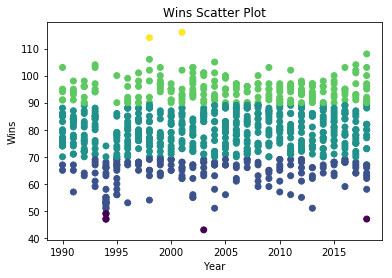

In [11]:
#Plotting scatter graph of Year vs.Wins
plt.scatter(df['yearID'], df['W'], c= df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [14]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k 
    games = v 
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

In [15]:
print(mlb_runs_per_game)

{1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1994: 4.9225, 1995: 4.847297967278136, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353909465, 2004: 4.813838550247117, 2005: 4.591731797614151, 2006: 4.857760395224372, 2007: 4.7967914438502675, 2008: 4.650947281713345, 2009: 4.612962962962963, 2010: 4.3843621399176955, 2011: 4.283244133388226, 2012: 4.324485596707819, 2013: 4.1659810777457835, 2014: 4.0660493827160495, 2015: 4.250102923013586, 2016: 4.477759472817134, 2017: 4.646502057613168, 2018: 4.448786507610037}


In [16]:
print(runs_per_year)

{1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1994: 15752, 1995: 19554, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 2017: 22582, 2018: 21630}


In [17]:
print(games_per_year)

{1990: 4210, 1991: 4208, 1992: 4212, 1993: 4538, 1994: 3200, 1995: 4034, 1996: 4534, 1997: 4532, 1998: 4864, 1999: 4856, 2000: 4858, 2001: 4858, 2002: 4852, 2003: 4860, 2004: 4856, 2005: 4862, 2006: 4858, 2007: 4862, 2008: 4856, 2009: 4860, 2010: 4860, 2011: 4858, 2012: 4860, 2013: 4862, 2014: 4860, 2015: 4858, 2016: 4856, 2017: 4860, 2018: 4862}


In [18]:
#Create lists from mlb_runs_per_game dictionary

lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

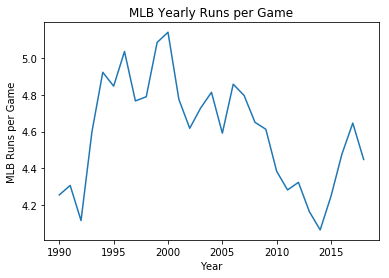

In [19]:
#create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [23]:
#Part 2- Linear and Logistical Regression Analysis

In [24]:
df.corr()['W']

yearID          0.109965
Rank           -0.779273
G               0.376730
Ghome           0.372358
W               1.000000
L              -0.720550
R               0.583108
AB              0.397741
H               0.484689
2B              0.368403
3B             -0.004774
HR              0.406879
BB              0.486509
SO              0.074004
SB              0.103861
HBP             0.196462
SF              0.349985
RA             -0.402933
ER             -0.381593
ERA            -0.590914
CG              0.066856
SHO             0.488286
SV              0.683249
IPouts          0.438397
HA             -0.145877
HRA            -0.175087
BBA            -0.221922
SOA             0.412157
E              -0.204783
DP             -0.019469
FP              0.351153
attendance      0.497893
BPF             0.062758
PPF            -0.060443
win_bins        0.905395
decade_label    0.111711
decade_1990    -0.129091
decade_2000     0.065671
decade_2010     0.062676
R_per_game      0.423970


In [25]:
#Import Libraries 

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import sqlite3
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import style
import pickle 

In [28]:
df['H'] = df['H'].fillna(df['H'].median())
df['AB'] = df['AB'].fillna(df['AB'].median())
df['BB'] = df['BB'].fillna(df['BB'].median())
df['HBP'] = df['HBP'].fillna(df['HBP'].median())
df['2B'] = df['2B'].fillna(df['2B'].median())
df['3B'] = df['3B'].fillna(df['3B'].median())
df['HR'] = df['HR'].fillna(df['HR'].median())
df['SF'] = df['SF'].fillna(df['SF'].median())



In [29]:
#Batting Average
BA = df['BA'] = df['H']/df['AB']

#On Base Percentage
OBP = df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF'])

#Slugging Percentage
SLG = df['SLG'] = (df['H'] + df['2B'] + (2*df['3B']) + (3*df['HR'])) / df['AB']

In [30]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,win_bins,decade_label,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,BA,OBP,SLG
2047,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,2,1990,1,0,0,4.209877,5.067901,0.250000,0.310853,0.395531
2048,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,3,1990,1,0,0,4.155280,4.335404,0.245471,0.329702,0.370055
2049,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,3,1990,1,0,0,4.314815,4.098765,0.272299,0.344003,0.395214
2050,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,3,1990,1,0,0,4.259259,4.358025,0.259964,0.328877,0.391382
2051,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,4,1990,1,0,0,4.209877,3.907407,0.257867,0.319805,0.379489


In [31]:
df.to_csv("matt_scatter")

In [32]:
df.corr()['W']

yearID          0.109965
Rank           -0.779273
G               0.376730
Ghome           0.372358
W               1.000000
L              -0.720550
R               0.583108
AB              0.397741
H               0.484689
2B              0.368403
3B             -0.004774
HR              0.406879
BB              0.486509
SO              0.074004
SB              0.103861
HBP             0.196462
SF              0.349985
RA             -0.402933
ER             -0.381593
ERA            -0.590914
CG              0.066856
SHO             0.488286
SV              0.683249
IPouts          0.438397
HA             -0.145877
HRA            -0.175087
BBA            -0.221922
SOA             0.412157
E              -0.204783
DP             -0.019469
FP              0.351153
attendance      0.497893
BPF             0.062758
PPF            -0.060443
win_bins        0.905395
decade_label    0.111711
decade_1990    -0.129091
decade_2000     0.065671
decade_2010     0.062676
R_per_game      0.423970


In [33]:
#Linear Regression- BA vs. W

X = np.array(df[["BA", "ERA"]])
y = np.array(df["W"])


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.25)

linear = linear_model.LinearRegression()

linear.fit(x_train,y_train)
acc = linear.score(x_test, y_test)
print(acc)


0.5650562897378759


In [34]:
#Linear Regression - OBP vs. W

X = np.array(df[["OBP", "SLG", "ERA"]])
y = np.array(df["W"])

best = 0 
for b in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.25)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc_OBP = linear.score(x_test, y_test)
    print(acc_OBP)

    if acc > best:
        best = acc
        with open("Winmodel.pickle", "wb") as f: 
            pickle.dump(linear, f)
    
pickle_in = open("Winmodel.pickle", "rb")
linear = pickle.load(pickle_in)


0.7587699090628813
0.7037368567338198
0.7753839849320109
0.6999902273504903
0.7967262973888215
0.6946376115766939
0.7834621131489101
0.674473088514455
0.7045570848295176
0.8025318834508696
0.8022408216719041
0.7567867152813894
0.7504857849558463
0.7612171616717631
0.6795200925172523
0.730627712968122
0.7463957167258665
0.69001982251519
0.6860569557571969
0.7751573381841723
0.7081397485982819
0.7370561387465158
0.7064501120417671
0.7579636903780744
0.6639458239249776
0.6321428363461997
0.706620493584385
0.7185520293138572
0.7177541765371089
0.7530124576072826


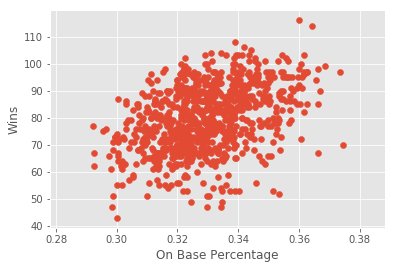

In [35]:
obp = df["OBP"]
style.use("ggplot")
plt.scatter(obp, df["W"])
plt.xlabel("On Base Percentage")
plt.ylabel("Wins")
plt.show()

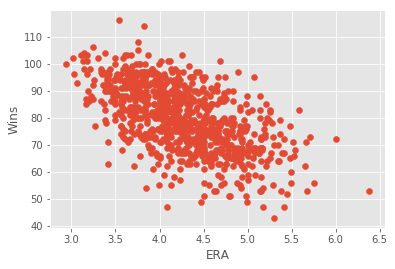

In [37]:
era = df["ERA"]
style.use("ggplot")
plt.scatter(era, df["W"])
plt.xlabel("ERA")
plt.ylabel("Wins")
plt.show()

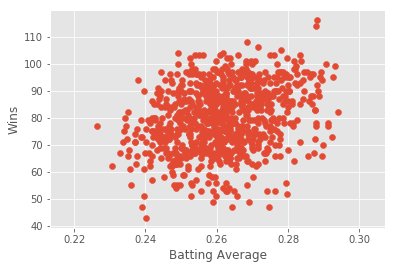

In [38]:
ba = df["BA"]
style.use("ggplot")
plt.scatter(ba, df["W"])
plt.xlabel("Batting Average")
plt.ylabel("Wins")
plt.show()

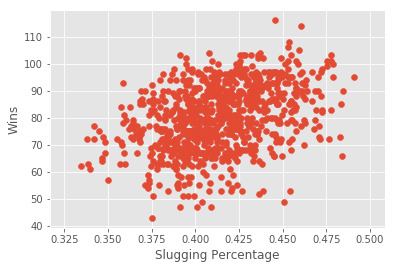

In [39]:
slg = df["SLG"]
style.use("ggplot")
plt.scatter(slg, df["W"])
plt.xlabel("Slugging Percentage")
plt.ylabel("Wins")
plt.show()

In [40]:
# converting dtypes using astype 
df["DivWin"]= df["DivWin"].astype(str) 

In [41]:
df.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP                  int64
FP          

In [42]:
#create a new column "HR", where if events =home_run, you have a 1, otherwise you have a 0
df['DivWin'] =np.where(df['DivWin']=='Y',1,0)

In [43]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,win_bins,decade_label,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,BA,OBP,SLG
2047,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,2,1990,1,0,0,4.209877,5.067901,0.250000,0.310853,0.395531
2048,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,3,1990,1,0,0,4.155280,4.335404,0.245471,0.329702,0.370055
2049,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,3,1990,1,0,0,4.314815,4.098765,0.272299,0.344003,0.395214
2050,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,3,1990,1,0,0,4.259259,4.358025,0.259964,0.328877,0.391382
2051,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,4,1990,1,0,0,4.209877,3.907407,0.257867,0.319805,0.379489


In [44]:
#DIFF
df["DIFF"] = df['R'] - df['RA']

#WHIP
df["WHIP"] = df["BB"] + df["H"] / (df["IPouts"]/3)

#LOB- (Hits, BB, HBP) - R - GIDP - CS
#OPS
df["OPS"] = OBP + SLG



In [61]:
df.corr()['DivWin']

yearID          0.041409
Rank           -0.659709
G               0.080272
Ghome           0.083823
W               0.593057
L              -0.534216
DivWin          1.000000
R               0.327241
AB              0.098342
H               0.219898
2B              0.159801
3B             -0.010652
HR              0.230653
BB              0.258018
SO             -0.023225
SB              0.066591
HBP             0.079229
SF              0.193172
RA             -0.298639
ER             -0.285446
ERA            -0.343090
CG              0.079297
SHO             0.291188
SV              0.368516
IPouts          0.118873
HA             -0.165457
HRA            -0.148921
BBA            -0.215737
SOA             0.204101
E              -0.143748
DP             -0.103876
FP              0.171764
attendance      0.359431
BPF             0.051043
PPF            -0.035094
win_bins        0.586636
decade_label    0.035656
decade_1990    -0.041432
decade_2000     0.021409
decade_2010     0.019776


In [62]:
#Import Logistical Regression

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [58]:
# Does a high batting average and low ERA correlate to a division title

X = df[["ERA", "BA"]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.7971698113207547, R2: 0.2028301886792453


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [59]:
# Does a high OBP, SLG, and ERA correlate to a Division Title

X = df[["ERA", "OPS", "DIFF"]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.2783018867924528, R2: 0.7216981132075472


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
# Does a high OBP, SLG, and ERA correlate to a Division Title

X = df[["ERA", "DIFF", "OPS", "SV" ]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.25471698113207547, R2: 0.7452830188679245


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


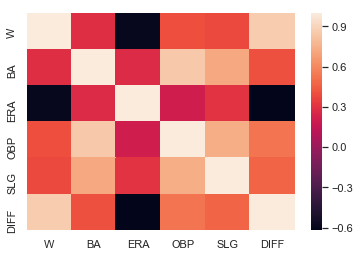

In [120]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df_linear = df

df_graph = df_linear[["W", "BA", "ERA", "OBP", "SLG", "DIFF" ]]

sns.heatmap(df_graph.corr())
plt.show()

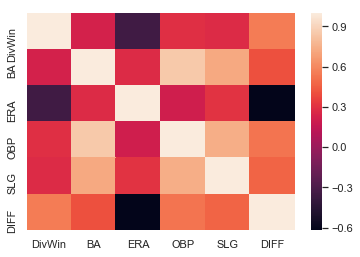

In [121]:
df_linear = df

df_graph = df_linear[[ "DivWin", "BA", "ERA", "OBP", "SLG", "DIFF" ]]

sns.heatmap(df_graph.corr())
plt.show()

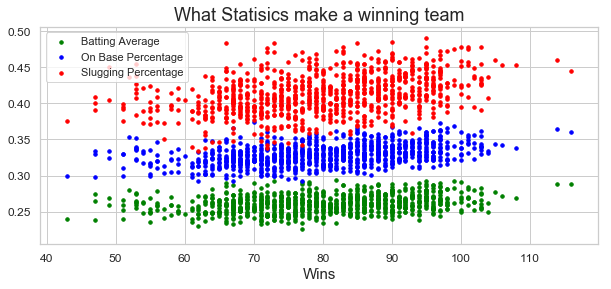

In [126]:
x = df_linear["W"]
BA = df_linear["BA"]
OBP = df_linear["OBP"]
SLG = df_linear["SLG"]
ERA = df_linear["ERA"]
DIFF = df_linear["DIFF"]
plt.figure(figsize = (10,4))

plt.scatter(x,BA, label = "Batting Average", s = 12,  color = "green")
plt.scatter(x, OBP, label = "On Base Percentage",  s= 12 , color = "blue")
plt.scatter(x, SLG, label = "Slugging Percentage", s= 12 , color = "red")



plt.xlabel("Wins", fontsize= 15) 
plt.xticks(size = 12) ; plt.yticks(size = 12)
plt.title("What Statisics make a winning team", fontsize = 18)




plt.legend()

